# Compute transport properties of porous media

To Do:
 - Write plan of the paper : Define your objectives, ask questions and do your Bibliography
 - Validate the model: 
     - Find tomography data with tranport prpoerties mesurements
         - VERCORS ? Ask Jean-Luc
         - Cement paste from my thesis - Use SEM image and convert it to 3D image : How to convert a 2D image to 3D image ?
 -For different images, from different composites materials , compute : 
     - Compute the desorption isotherm
     - 
 - Perform analysis from different images: get the images from Imperial college website: done
 - compute relative perbeability: wait for release of openpnm version 3 on mid Sptember 2022 
 - Use Snakeflow to automate -> follow NASA data python for scientist course
 - Write proposal

# Computationally Efficient Multiscale framework for determination of transport properties in Complex 3D Porous Media


## Question :

- Desorption isotherm: 
    - Can we compute the desorption and adsorption isotherm from tomography image ?
    - Does someone already that ? 
    - How can we buid on and what new insights do we need to deliver ?

# Innovations

 -  We implement a DRP workflow for the prediction of the main concrete properties starting from tomographic 3D image.
 -  We apply the developed strategies to five concrete datasets, and we compare computed results to experimental measurements.
 -  We propose specific strategies to make the entire DRP process less operator dependen.
 -  We propose a comparison to data-driven technique


## Abstract

- Digital Rock Physics

Digital rock physics combines microtomographic imaging with advanced numerical simulations of effective material properties. It is used to complement laboratory investigations with the aim to gain a deeper understanding of relevant physical processes related to transport and effective mechanical properties. We apply digital rock physics to cement-based composites. For these materials, hydro-mechanical experiments are very difficult to perform and time consuming.

Comparing experimental with numerical results and theoretical estimates, we demonstrate the high potential of in situ characterization with respect to the investigation of effective material properties. We show that a digital rock physics workflow, so far applied to conventional rocks, yields reasonable results for cement-based composites and can be adopted for these materials. Numerically determined porosities, effective elastic properties, thermal conductivities and permeabilities show a fair agreement to experimental results that required exeptionally high experimental efforts. 
  
Numerically determined porosities, effective elastic properties, thermal conductivities and permeabilities show a fair agreement to experimental results that required exeptionally high experimental efforts. 
   

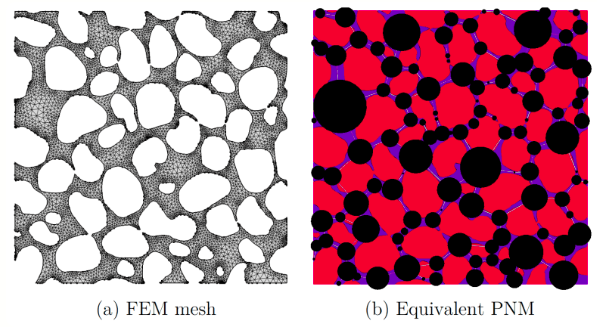

# Introduction

The trasport properties of complex porous materials is of interest to many engineering disciplines. 

- Pore-scale models

The two most commonly used pore-scale modeling approaches are pore network modeling (PNM) and direct numerical simulation (DNS).

The direct flow simulation methods yield the most accurate results but are very computationally expensive while semi-analytical models such as pore network modeling (PNM) rely on averaged structural properties (i.e., porosity and tortuosity) only partly summarize the domain, but are time-cost effective;
Study by Gostick et all  2016 compared the simulation time of the Direct Numerical Simulation (DNS) and PNM methods on 798 × 798 × 279 μm  sample. The average simulation time for the dry samples, with around 50 million DOFs, was about 5 hours per direction on a single core of Intel® Xeon(R) CPU E5-2690 v2 with a clock speed of 3.00 GHz. For the PNM simulations using the same images, the entire simulations in all directions for one image stack took around 5 min.

PNM treats the pores as nodes on a network and throats as the links, and geometric properties are assigned to each pore and throat based on the physical space they represent. One can either generate an artiﬁcial pore network or extract the network from imaging techniques, such as μCT. In PNM, transport inside the network is solved using a simpliﬁed 1D analytical solution of the relevant transport equations in each pore between pairs of connected pores. DNS, on the other hand, solves the transport equations on computational meshes generated from the tomography images instead of extracting idealized networks. In voxel-based mesh generation, a mesh can be generated by the direct conversion of the image voxels into mesh elements or the use of triangulation algorithms. DNS does not rely on a simpliﬁed geometry, however, it needs more computational resources than PNM.

- Why we choose PNM ?

Every numerical approach has strengths and drawbacks. The main drawback of DNS is the high computational cost and time. However, since it directly solves the governing transport equations at each mesh element, there is no need for assumptions or simpliﬁcations. On the other hand, PNM utilizes simpliﬁed geometry and governing equations, which leads to a much faster simulation time and cheaper computational cost. Due to its simpliﬁcations, it cannot avoid sacriﬁcing geometrical accuracy.

- X-ray computed tomography (μCT)

Micro X-ray computed tomography (μCT) is the most commonly used tool to investigate complex materials microstructures. 
High resolution, non-destructive, multi-length scale X-ray tomography (XCT) has become
increasingly popular for characterizing the microstructures and properties of many cementitious materials, cement
(Meyer et al., 2009) and concrete (Garboczi, 2002, Wang et al., 2003, Trtik et al., 2007, Landis and Bolander, 2009,de Wolski et al., 2014). 



- Review on Pore network modeling

Pore-scale models resolve the heterogeneity of the porous media by solving the governing equations of a given physical process.



Many studies have employed PNM to study the transport properties of porous media under dry and saturated conditions. The most common pore and throat shapes used in recent studies are spherical pores and cylindrical throats. A pore network with different pore and throat shapes is also possible. Gostick et al. 16 employed a cubic network with cubic pores and cuboid throats, and computed transport properties of Toray and SGL GDL samples
because attaining high porosity (⩾80%) was challenging when using spherical pores and cylindrical throats in a cubic domain. The cubic pores, however, are not able to fully represent the entangled ﬁbrous structure of GDLs. Therefore, 3D irregular pore networks were developed using Voronoi and Delaunay tessellations. This provides a better topological equivalence than cubic networks as it can account for randomly distributed pores with multiple connections that can achieve a high porosity of ﬁbrous media. The Voronoi and Delaunay tessellation are only approximate representations of ﬁbrous media. It is possible and preferable to extract networks directly from μCT images. Some studies employed watershed segmentation in order to extract a pore network from a 3D image of a microstructure.

The watershed segmentation ﬁnds constrictions and separates the entire void phase into a set of local pore regions. These pore regions are then used to extract simpliﬁed spherical pores and cylindrical throats. Gostick 21 validated a watershed-based network extraction algorithm and showed that the extraction provided acceptable predictions of the transport properties of ﬁbrous media. Chevalier et al. 22 showed good agreements in in-plane effective diffusivities of several GDLs with experimental data using the network extraction technique. Lee et al. 23,24 employed PNM to study the impact of the PTL microstructure on the transport properties using stochastic PTL reconstructions for the ﬁrst time.



-


## Methods


 ### X-ray computed tomography (μCT)

The advantages of using μCT for microscale visualization include an appropriate resolution given the material pore sizes, phase differentiation, and the non-destructive nature of the technique. With the 3D images obtained from tomography, pore-scale simulations can be performed to estimate transport properties from the image directly. 
However, 3D XCT images have only occasionally been used to build geometrically realistic numerical models to study the mechanical behavior of materials.

### Network extraction.

The SNOW algorithm in PoreSpy (open source porous media image analysis
toolkit, 51 ) which uses a watershed segmentation algorithm todetermine the pore and throat regions based on the distance from the solid region, was used to extract the pore network from the
segmented μCT images. To determine markers for the watershed segmentation, the algorithm ﬁrst applies a Gaussian ﬁlter with a sigma of 0.4 to remove spurious peaks from the distance transform.

A maximum ﬁlter with a structuring element with a radius of 4 wasthen applied to determine the markers which were used as the centers of the pores. In this article, the same parameters are used for all materials as recommended by Gostick 21 to extract spherical pores and cylindrical throats from input images. More details about the algorithm and illustrations of the pore network extraction can be found in the reference.

The network extraction is one of the most critical steps in the PNM simulation. According to Gostick, 21 selecting inappropriate parameters for the two ﬁlters can result in under- or over-segmentation of the domain. When the structural element is small, many spurious peaks appear making identiﬁcation of throats challenging. On the other hand, when the structural element is too large, some maxima would be missed. The SNOW algorithm and watersheds, ingeneral, are therefore dependent on image resolution to ensure small voids that are represented by enough pixels to be detected. This problem could be avoided by zooming the image by a factor 2, however, it was not applied in this work to keep the same input conditions.


### Transport algorithms

One of the strengths of PNMs is the simplicity of the model with which they can simulate the multiphase transport characteristics of porous media with a low computational cost. Transport models in OpenPNM treat the transport between two neighboring pores as 1D linear transport through three elements in series, i.e., half of each pore and the connecting throat. The conductance between two pores is determined by the geometric properties, i.e., radii, lengths, and shapes, of the elements and the ﬂuid properties. A single value of conductance is determined for
the conduit, and this determines the transport of a phase between the pores via analogy to Kirchhoff’s law. At steady state and in the absence of reaction, the algebraic sum of transporting species entering and exiting each pore is zero, so a set of linear equations can be solved to ﬁnd the quantity of interest in each pore, i.e., concentration, and the ﬂow through each throat. A detailed description of the transport models used in OpenPNM can be found in the work by Gostick. 

The governing equations used for the diffusion and permeation are summarized in Table II. The relative transport properties were computed by solving the governing equations in each phase
separately. The conductance values, i.e., hydraulic or diffusive conductance, of pores and throats occupied by the intruding phase were severely reduced to prevent the ﬂow of the defending
phase from being calculated on the saturated pores. This was done by replacing the original conductance values by a value of nearly zero (10 −20 ). The defending phase cannot pass through the pores and throats that are saturated by the intruding phase. The transport of the defending phase occurs through the non-saturated pores only. Likewise, transport properties for the intruding phase can be determined based on the invasion steps made by the percolation algorithm. When computing transport properties, if either pore was intruded by the intruding phase, the connecting throats were
restricted. More details of the relative transport in OpenPNM can also be found in Ref. 16.

### Intrusion

To study multiphase ﬂow in porous media using PNM, an invasion percolation algorithm in the open source software OpenPNM 14 was used. The invasion percolation algorithm follows the deﬁnition explained by Wilkinson and Willemsen 52 and the details of the algorithm were outlined by Gostick et al. 53 Invasion of a non-wetting phase through the domain starts from the boundary pores by intruding accessible throats of the least capillary entry pressure. The algorithm continues until the entire domain is saturated by the non-wetting phase.

For mercury intrusion porosimetry (MIP), the intrusion was assumed to occur from all six boundaries. This was done with a mercury surface tension of 0.46 N m−1 and a contact angle of 140°. For the water intrusion through the porous media, the bottom face of the porous media was selected as a boundary. The water intrusion simulations for the ﬁbrous GDLs were done with a water-air surface tension of 0.072 N m−1 and a contact angle of 110°. 10 The intrusion for the Ti samples was done by injecting air into a water-ﬁlled sample, the air contact angle used for the Ti samples was 130° as Ti is hydrophilic.

## Code for computing relative permeability and relative diffusivity from tomography images 

In [1]:
import os
import imageio
import scipy as sp
import numpy as np
import openpnm as op
import openpnm.models.geometry as gmods
from openpnm.models import physics as pm
import porespy as ps
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
import openpnm.models as mods
np.random.seed(10)
%matplotlib inline

## Invasion simulation

In [3]:
np.random.seed(1)
im = ps.generators.blobs(shape=[150, 150], porosity=0.6, blobiness=1)
inlets = np.zeros_like(im)
inlets[0, :,] = True
inv = ps.simulations.drainage(im=im, inlets=inlets, voxel_size=1, g=0)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

## Liquid water distribution

To validate the distribution of liquid water in the domain, a one-to-one comparison was done between the experimental and numerical reconstructions. Therefore, in order to generate the images in Fig. Water distribution, the labels of saturated pores in PNM simulations from the extracted network and the same labels in t watershed segmented reconstruction were marked to
obtain saturated reconstructions from PNM.  To compare the water distribution within the domain, the numerical water distributions are extracted at similar saturation values to the experimental reconstruction.

Figure… shows a comparison of the experimental and simulated liquid water distribution in the x-y plane at 50% and 80% through-plane depth from the inlet face.  The distributions from PNM in
Fig. 6c and 6f show larger clusters similar to the experimental water
distributions

PNM segments the entire void part into discrete pore regions and each region is fully invaded in a single step. This resulted in the larger water clusters which are visually closer to the experimental reconstruction.



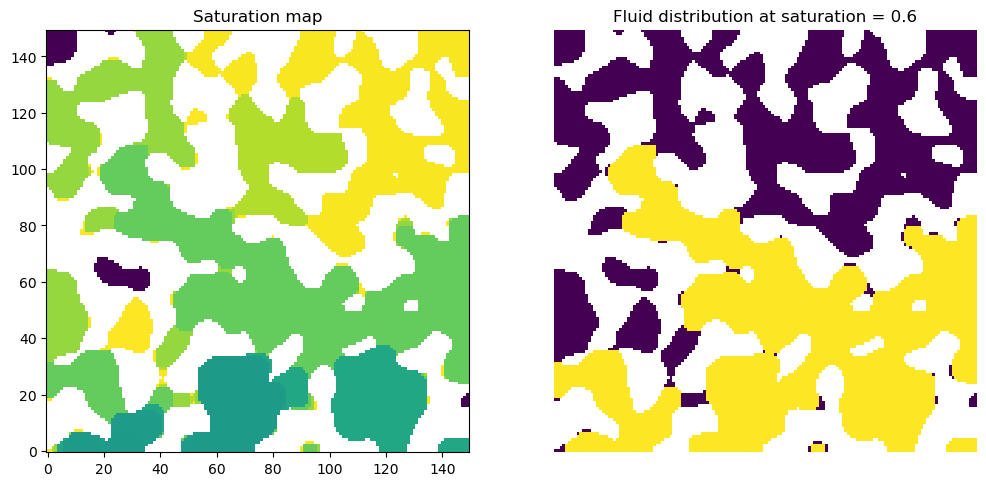

In [4]:

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(inv.im_satn/im, interpolation='none', origin='lower')
#ax[0].axis(:)
ax[0].set_title('Saturation map')
ax[1].imshow((inv.im_satn < 0.6)*(inv.im_satn > 0)/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('Fluid distribution at saturation = 0.6');

## Capillary pressure curve

The porosimetry function returns an image indicating the radius of the capillary meniscus that at which is was invaded. In this case the Washburn equation is used to convert sizes to capillary pressures, surface tension (sigma) and contact (theta) must be provided, as well as voxel size (voxel_size) if the sizes array is in units of voxels.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

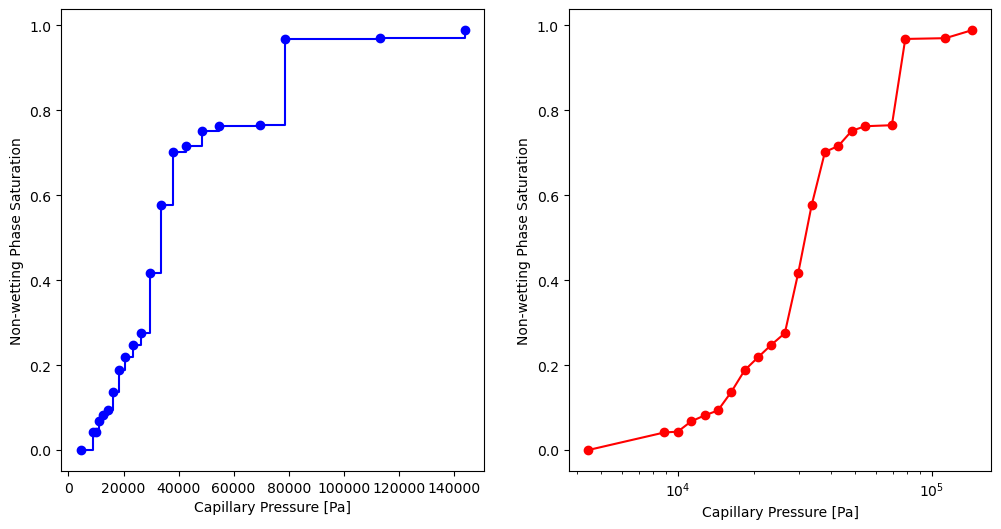

In [5]:
drainage = ps.filters.porosimetry(im)

data = ps.metrics.pc_curve(im=im,sizes=drainage,voxel_size=1.e-6)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].step(data.pc, data.snwp, 'b-o', where='post')
ax[0].set_xlabel('Capillary Pressure [Pa]')
ax[0].set_ylabel('Non-wetting Phase Saturation')
ax[1].semilogx(data.pc, data.snwp, 'r-o')
ax[1].set_xlabel('Capillary Pressure [Pa]')
ax[1].set_ylabel('Non-wetting Phase Saturation');


## Computation of saturation profile 

In order to assess the accuracy of the simulated intrusion results, the local saturation proﬁles in the through-plane direction are shown in Fig…
Local saturation proﬁles were obtained by the ratio of the number of pixels assigned to the water phase to the sum of pixels in the void and water phase at a given distance from the bottom face
(z = 0). At the inlet face, the experimental distribution shows nearly X% of saturation.


In [6]:
inlets = np.zeros_like(im)
inlets[0,:] = True
inv = ps.simulations.drainage(im=im, inlets=inlets, voxel_size=1e-5,g=0)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Text(0, 0.5, 'non_wetting phase sauration')

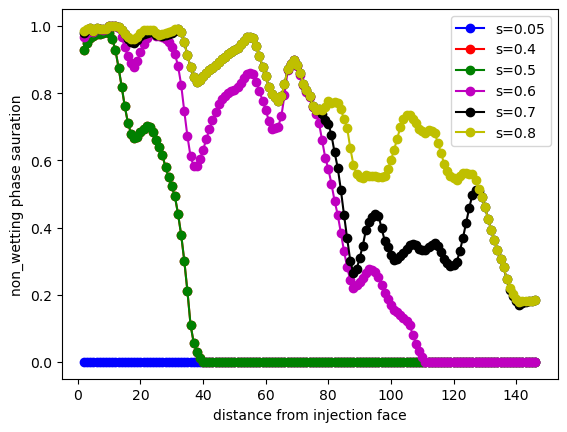

In [7]:
sp = 5
color_list = ['b-o','r-o','g-o','m-o','k-o','y-o','r--^']
jj=0
for ii in [0.05,0.4,0.5,0.6,0.7,0.8]:
    s = ps.metrics.satn_profile(satn=inv.im_satn,s=ii,span=sp,mode='slide')
    plt.plot(s.position,s.saturation, color_list[jj],label= f"s={ii}")
    jj=jj+1
plt.legend()
plt.xlabel("distance from injection face")
plt.ylabel("non_wetting phase sauration")

## Comparison of flow in multiple directions


### Is the flow isotropic or anisotropic ?

In [ ]:
sp= 5
color_list = ['b-o','r-o','g-o','m-o','k-o','y-o','r--^']
jj=0
for ii in [0.5,0.7,0.8]:
   # s = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, span=s)
    s1 = ps.metrics.satn_profile(satn=inv.im_satn,s=ii,span=sp,mode='slide',axis=0)
    plt.plot(s1.position,s1.saturation, color_list[jj],label= f"s={ii}")
    s2 = ps.metrics.satn_profile(satn=inv.im_satn,s=ii,span=sp,mode='slide',axis=1)
    plt.plot(s2.position,s2.saturation, color_list[jj])
    jj=jj+1
plt.legend()
plt.xlabel("distance from injection face")
plt.ylabel("non_wetting phase sauration")

## Computing relative permeability and diffusitivity

Liquid water distribution


To validate the distribution of liquid water in the domain, a one-to-one comparison was done between the experimental and numerical reconstructions. Therefore, in order to generate the images in Fig. Water distribution, the labels of saturated pores in PNM simulations from the extracted network and the same labels in t watershed segmented reconstruction were marked to
obtain saturated reconstructions from PNM.  To compare the water distribution within the domain, the numerical water distributions are extracted at similar saturation values to the experimental reconstruction.

Figure… shows a comparison of the experimental and simulated liquid water distribution in the x-y plane at 50% and 80% through-plane depth from the inlet face.  The distributions from PNM in
Fig. 6c and 6f show larger clusters similar to the experimental water
distributions

PNM segments the entire void part into discrete pore regions and each region is fully invaded in a single step. This resulted in the larger water clusters which are visually closer to the experimental reconstruction.



In order to assess the accuracy of the simulated intrusion results, the local saturation proﬁles in the through-plane direction are shown in Fig…
Local saturation proﬁles were obtained by the ratio of the number of pixels assigned to the water phase to the sum of pixels in the void and water phase at a given distance from the bottom face

In [9]:
path = '/home/justin/Documents/artices4_these/'
file_format = '.tif'
#file_name = 'Berea_sandstone'
file_name = 'beadpack'
file = file_name + file_format
fetch_file = os.path.join(path, file)
im = imageio.mimread(fetch_file)
im_org =im.copy()
im = ~np.array(im, dtype=bool)[:250, :250, :250] # Make image a bit smaller

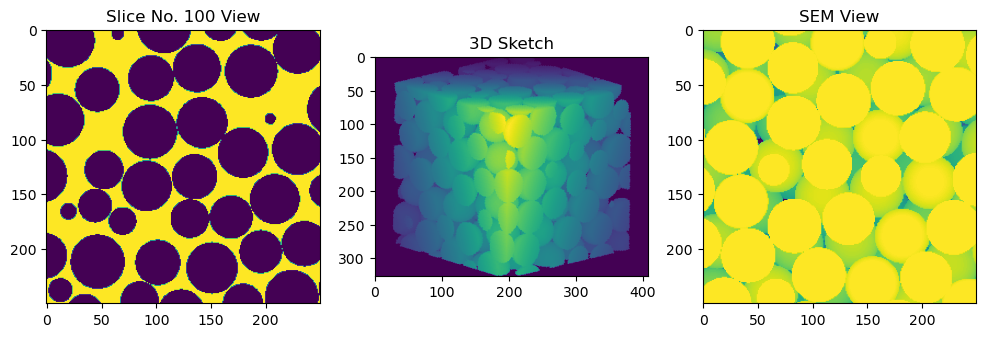

In [10]:
# NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].imshow(im[:, :, 100]);
ax[1].imshow(ps.visualization.show_3D(im));
ax[2].imshow(ps.visualization.sem(im));
ax[0].set_title("Slice No. 100 View");
ax[1].set_title("3D Sketch");
ax[2].set_title("SEM View");

In [ ]:
settings = {'pore_shape': 'pyramid',
            'throat_shape': 'cuboid',
            
            'pore_diameter': 'equivalent_diameter',
            'throat_diameter': 'inscribed_diameter'}

  
#NBVAL_IGNORE_OUTPUT

resolution = 1e-6
snow = ps.networks.snow2(im, voxel_size=resolution,accuracy='standard')
proj= op.io.PoreSpy.import_data(snow.network, settings=settings)
net = proj[0]
geo =proj[1]

#net = op.io.network_from_porespy(snow.network)   

pn = ps.networks.label_boundaries(net,labels=[['left', 'right'], ['front', 'back'], [ 'bottom','top']], tol=1e-9)

In [11]:
proj= pn.project

geo['pore.area']=geo['pore.surface_area']

geo['throat.area'] =  geo['throat.cross_sectional_area']    

geo['throat.surface_area'] = geo['throat.volume']/geo['throat.equivalent_diameter']

geo['throat.conduit_lengths.pore1']= geo['throat.length']
geo['throat.conduit_lengths.pore2']= geo['throat.length']

geo.add_model(propname='throat.endpoints',
              model=mods.geometry.throat_endpoints.spherical_pores)
geo.add_model(propname='pore.area',
              model=mods.geometry.pore_cross_sectional_area.sphere)
geo.add_model(propname='pore.volume',
              model=mods.geometry.pore_volume.sphere)
geo.add_model(propname='throat.length',
              model=mods.geometry.throat_length.ctc)
geo.add_model(propname='throat.volume',
              model=mods.geometry.throat_volume.cylinder)
geo.add_model(propname='throat.area',
              model=mods.geometry.throat_cross_sectional_area.cylinder)
geo.add_model(propname='throat.surface_area',
              model=mods.geometry.throat_surface_area.cylinder)
geo.add_model(propname='throat.endpoints',
              model=mods.geometry.throat_endpoints.spherical_pores)
geo.add_model(propname='throat.conduit_lengths',
              model=mods.geometry.throat_length.conduit_lengths)

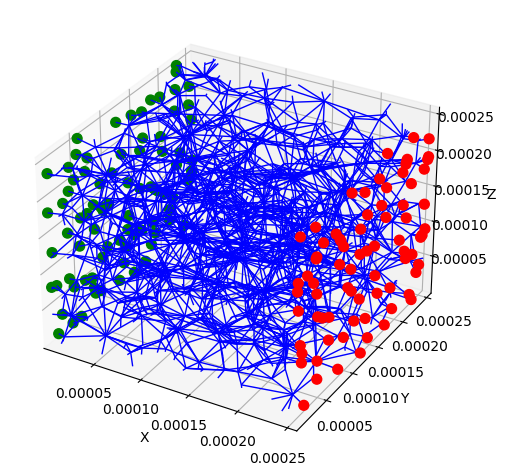

In [12]:
fig, ax = plt.subplots()
op.topotools.plot_connections(network=pn, ax=ax)
op.topotools.plot_coordinates(network=pn,
                              ax=ax,
                              pores=pn['pore.right'],
                              markersize=50, c='r');
op.topotools.plot_coordinates(network=pn,
                              ax=ax,
                              pores=pn['pore.left'],
                              markersize=50, c='g');

In [13]:
h = pn.check_network_health()
op.topotools.trim(network=pn, pores=h['trim_pores'])
h = pn.check_network_health()
print(h)

# Handle Boundary Pores - Zero Volume for saturation but not zero diam and area
# For flow calculations
geo['pore.volume'][geo['pore.area'] == 0.0] = 0
geo['pore.diameter'][geo['pore.diameter'] == 0.0] = geo['pore.diameter'].max()
geo['pore.area'][geo['pore.area'] == 0.0] = geo['pore.area'].max()

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
key                                 value
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
disconnected_clusters               []
isolated_pores                      []
trim_pores                          []
duplicate_throats                   []
bidirectional_throats               []
headless_throats                    []
looped_throats                      []
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


------------------------------------------------------------
SOURCE     : openpnm.algorithms.OrdinaryPercolation.get_intrusion_data 
TIME STAMP : 2022-10-31 11:19:32,921
------------------------------------------------------------


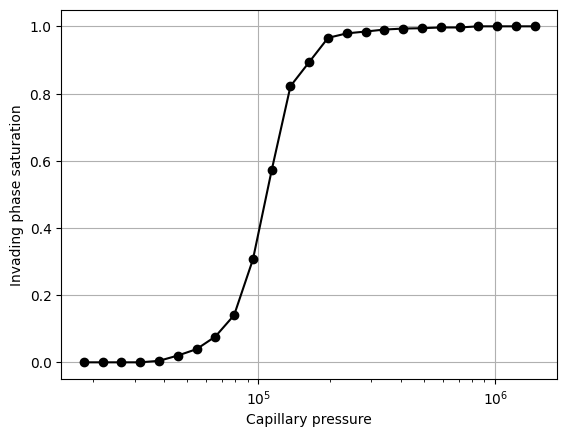

In [14]:
Hg = op.phases.Mercury(network=pn)
phys = op.physics.Standard(network=pn, phase=Hg, geometry=geo)
# Create algorithm and run simulation
mip = op.algorithms.Porosimetry(network=pn, phase=Hg)
mip.set_inlets(pores=pn.pores(['left', 'right', 'top', 'bottom']))
mip.run()
mip.plot_intrusion_curve() 

Assign phases

In [15]:
air = op.phases.Air(network=pn,name='air')
water = op.phases.Water(network = pn, name = 'water')
# Reset pore contact angle
water['pore.contact_angle'] = 110.0
#water['pore.temperature'] = 353

In [16]:
phys_air = op.physics.Standard(network=pn, phase=air, geometry=geo)
phys_water = op.physics.Standard(network=pn, phase=water, geometry=geo)
#phys_water = op.physics.Basic(network=pn, phase=water, geometry=geo)


In [17]:
OP_1 = op.algorithms.OrdinaryPercolation(network=pn)
OP_1.set_inlets(pores=pn.pores('bottom'))
OP_1.set_outlets(pores=pn.pores('top'))
OP_1.settings['trapping']=True
OP_1.setup(phase=water, pore_volume='pore.volume', throat_volume='throat.volume',access_limited=True)
OP_1.run(points=100)

In [18]:
data = OP_1.get_intrusion_data()

# Filter for evenly spaced sat inc. first and last

filter_pc = [data.Pcap[0]]
sat = [data.Snwp[0]]
for i, pc in enumerate(data.Pcap):
    if  data.Snwp[i] - sat[-1] > 0.01:
        filter_pc.append(pc)
        sat.append(data.Snwp[i])
filter_pc.append(data.Pcap[-1])
sat.append(data.Snwp[-1])


------------------------------------------------------------
SOURCE     : openpnm.algorithms.OrdinaryPercolation.get_intrusion_data 
TIME STAMP : 2022-10-31 11:19:39,664
------------------------------------------------------------


In [19]:
def update_phase_and_phys(results):
    water['pore.occupancy'] =results['pore.occupancy']
    air['pore.occupancy'] = 1-results['pore.occupancy']
    water['throat.occupancy']= results['throat.occupancy']
    air['throat.occupancy'] = 1-results['throat.occupancy']
    # Add multiphase conductances
    mode='loose'
    phys_air.add_model(model=mods.physics.multiphase.conduit_conductance,
                       propname='throat.conduit_diffusive_conductance',
                       throat_conductance='throat.diffusive_conductance',
                       mode=mode)
    phys_water.add_model(model=mods.physics.multiphase.conduit_conductance,
                         propname='throat.conduit_diffusive_conductance',
                         throat_conductance='throat.diffusive_conductance',
                         mode=mode)
    phys_air.add_model(model=mods.physics.multiphase.conduit_conductance,
                       propname='throat.conduit_hydraulic_conductance',
                       throat_conductance='throat.hydraulic_conductance',
                       mode=mode)
    phys_water.add_model(model=mods.physics.multiphase.conduit_conductance,
                         propname='throat.conduit_hydraulic_conductance',
                         throat_conductance='throat.hydraulic_conductance',
                         mode=mode)

In [20]:
update_phase_and_phys(OP_1.results(Pc=1e3))

In [21]:
atm1=0
atm2=1

In [22]:
perm_air = {'0': [], '1': [], '2': []}
diff_air = {'0': [], '1': [], '2': []}
perm_water = {'0': [], '1': [], '2': []}
diff_water = {'0': [], '1': [], '2': []}

max_Pc = max(OP_1['throat.invasion_pressure'])

num_seq = 20
pore_volumes = pn['pore.volume']
throat_volumes = pn['throat.volume']
totV = np.sum(pore_volumes) + np.sum(throat_volumes)

K_air_single_phase = [None, None, None]
D_air_single_phase = [None, None, None]
K_water_single_phase = [None, None, None]
D_water_single_phase = [None, None, None]

bounds = [['xmin', 'xmax'], ['ymin', 'ymax'], ['zmax', 'zmin']]

for bound_increment in range(len(bounds)):
    # Run Single phase algs effective properties
    BC1_pores = pn.pores(labels=bounds[bound_increment][0])
    BC2_pores = pn.pores(labels=bounds[bound_increment][1])
    
    # Effective permeability : air
    sf_air = op.algorithms.StokesFlow(network=pn, phase=air)
    sf_air.setup(conductance='throat.hydraulic_conductance')
    sf_air.set_value_BC(values=atm1, pores=BC1_pores)
    sf_air.set_value_BC(values=atm2, pores=BC2_pores)
    sf_air.run()
    K_air_single_phase[bound_increment] = sf_air.calc_effective_permeability()
    proj.purge_object(obj=sf_air)
    
    # Effective diffusivity : air
    fd_air = op.algorithms.FickianDiffusion(network=pn,phase=air)
    fd_air.setup(conductance='throat.diffusive_conductance')
    
    ## Setting Value Boundary Conditions
    fd_air.set_value_BC(values=atm1, pores=BC1_pores)
    fd_air.set_value_BC(values=atm2, pores=BC2_pores)
    fd_air.run()
    D_air_single_phase[bound_increment] = fd_air.calc_effective_diffusivity()
    proj.purge_object(obj=fd_air)
    
    # Effective permeability : water
    sf_water = op.algorithms.StokesFlow(network=pn, phase=water)
    sf_water.setup(conductance='throat.hydraulic_conductance')
    sf_water.set_value_BC(values=atm1, pores=BC1_pores)
    sf_water.set_value_BC(values=atm2, pores=BC2_pores)
    sf_water.run()
    K_water_single_phase[bound_increment] = sf_water.calc_effective_permeability()
    proj.purge_object(obj=sf_water)
    
    # Effective diffusivity : water
    fd_water = op.algorithms.FickianDiffusion(network=pn,phase=water)
    fd_water.setup(conductance='throat.diffusive_conductance')
    fd_water.set_value_BC(values=atm1, pores=BC1_pores)
    fd_water.set_value_BC(values=atm2, pores=BC2_pores)
    fd_water.run()
    D_water_single_phase[bound_increment] = fd_water.calc_effective_diffusivity()
    proj.purge_object(obj=fd_water)

------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:43,520
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:43,522
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:43,522
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:43,523
---------------------------------------

In [23]:
for Pc in filter_pc:
    update_phase_and_phys(OP_1.results(Pc=Pc))
    print('-' * 80)
    print('Pc', Pc)
    for bound_increment in range(len(bounds)):
        BC1_pores = pn.pores(labels=bounds[bound_increment][0])
        BC2_pores = pn.pores(labels=bounds[bound_increment][1])

        # Multiphase
        sf_air = op.algorithms.StokesFlow(network=pn,phase=air)
        sf_air.setup(conductance='throat.conduit_hydraulic_conductance')
        sf_water = op.algorithms.StokesFlow(network=pn,phase=water)
        sf_water.setup(conductance='throat.conduit_hydraulic_conductance')

        fd_air = op.algorithms.FickianDiffusion(network=pn,phase=air)
        fd_air.setup(conductance='throat.conduit_diffusive_conductance')
        fd_water = op.algorithms.FickianDiffusion(network=pn,phase=water)
        fd_water.setup(conductance='throat.conduit_diffusive_conductance')

        #BC1
        sf_air.set_value_BC(values=atm1, pores=BC1_pores)
        sf_water.set_value_BC(values=atm1, pores=BC1_pores)
        fd_air.set_value_BC(values=atm1, pores=BC1_pores)
        fd_water.set_value_BC(values=atm1, pores=BC1_pores)

        #BC2
        sf_air.set_value_BC(values=atm2, pores=BC2_pores)
        sf_water.set_value_BC(values=atm2, pores=BC2_pores)
        fd_air.set_value_BC(values=atm2, pores=BC2_pores)
        fd_water.set_value_BC(values=atm2, pores=BC2_pores)

        # Run Multiphase algs
        sf_air.run()
        sf_water.run()
        fd_air.run()
        fd_water.run()

        Keff_air_mphase = sf_air.calc_effective_permeability()
        Deff_air_mphase = fd_air.calc_effective_diffusivity()
        Keff_water_mphase = sf_air.calc_effective_permeability()
        Deff_water_mphase = fd_water.calc_effective_diffusivity()

        Kr_eff_air = Keff_air_mphase / K_air_single_phase[bound_increment]
        Kr_eff_water = Keff_water_mphase / K_water_single_phase[bound_increment]
        Dr_eff_air = Deff_air_mphase / D_air_single_phase[bound_increment]
        Dr_eff_water = Deff_water_mphase / D_water_single_phase[bound_increment]

        perm_air[str(bound_increment)].append(Kr_eff_air)
        diff_air[str(bound_increment)].append(Dr_eff_air)
        perm_water[str(bound_increment)].append(Kr_eff_water)
        diff_water[str(bound_increment)].append(Dr_eff_water)
        
        
        proj.purge_object(obj=sf_air)
        proj.purge_object(obj=sf_water)
        proj.purge_object(obj=fd_air)
        proj.purge_object(obj=fd_water)

------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:43,965
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:43,966
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:43,966
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:43,968
---------------------------------------

--------------------------------------------------------------------------------
Pc 1229.6565364540675


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:44,099
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:44,100
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:44,101
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:44,102
---------------------------------------

--------------------------------------------------------------------------------
Pc 2851.8545493120982


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:44,439
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:44,440
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:44,440
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:44,441
---------------------------------------

--------------------------------------------------------------------------------
Pc 3888.0122691134343


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:44,843
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:44,844
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:44,845
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:44,846
---------------------------------------

--------------------------------------------------------------------------------
Pc 4641.32583341502


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:45,187
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:45,188
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:45,189
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:45,190
---------------------------------------

--------------------------------------------------------------------------------
Pc 5300.634777612663


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:45,620
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:45,621
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:45,622
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:45,623
---------------------------------------

--------------------------------------------------------------------------------
Pc 5540.596068344642


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:45,996
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:45,997
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:45,998
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:45,999
---------------------------------------

--------------------------------------------------------------------------------
Pc 6053.599780337698


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:46,341
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:46,342
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:46,343
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:46,344
---------------------------------------

--------------------------------------------------------------------------------
Pc 6327.648017541263


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:46,729
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:46,730
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:46,731
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:46,732
---------------------------------------

--------------------------------------------------------------------------------
Pc 6913.524858433943


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:47,079
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:47,080
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:47,081
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:47,082
---------------------------------------

--------------------------------------------------------------------------------
Pc 7553.6480277796045


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:47,457
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:47,458
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:47,459
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:47,460
---------------------------------------

--------------------------------------------------------------------------------
Pc 7895.603889016554


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:47,840
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:47,842
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:47,842
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:47,843
---------------------------------------

--------------------------------------------------------------------------------
Pc 8253.040192366276


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:48,219
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:48,220
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:48,220
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:48,221
---------------------------------------

--------------------------------------------------------------------------------
Pc 8626.657741982666


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:48,589
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:48,590
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:48,591
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:48,592
---------------------------------------

--------------------------------------------------------------------------------
Pc 9017.189067629208


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:48,964
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:48,966
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:48,966
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:48,967
---------------------------------------

--------------------------------------------------------------------------------
Pc 9425.399860906515


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:49,349
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:49,350
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:49,351
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:49,352
---------------------------------------

--------------------------------------------------------------------------------
Pc 9852.09047649857


------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:49,693
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:49,694
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:49,695
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:49,697
---------------------------------------

--------------------------------------------------------------------------------
Pc 10298.097501380511


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:50,062
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:50,063
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:50,064
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:50,065
---------------------------------------

--------------------------------------------------------------------------------
Pc 10764.29539506525


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:50,411
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:50,413
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:50,413
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:50,414
---------------------------------------

--------------------------------------------------------------------------------
Pc 11760.961354204204


------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:50,746
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:50,746
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:50,747
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:50,748
---------------------------------------

--------------------------------------------------------------------------------
Pc 12293.383523474045


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:51,097
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:51,098
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:51,099
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:51,100
---------------------------------------

--------------------------------------------------------------------------------
Pc 12849.908600473364


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:51,477
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:51,478
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:51,478
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:51,479
---------------------------------------

--------------------------------------------------------------------------------
Pc 13431.627730902916


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:51,884
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:51,886
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:51,886
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:51,887
---------------------------------------

--------------------------------------------------------------------------------
Pc 14675.261953478668


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:52,273
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:52,275
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:52,275
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:52,276
---------------------------------------

--------------------------------------------------------------------------------
Pc 22849.249536507767


------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:52,667
------------------------------------------------------------
------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:52,669
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:52,670
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:52,671
---------------------------------------

--------------------------------------------------------------------------------
Pc 98495.41164138497


------------------------------------------------------------
ERROR      : Inlet and outlet faces are different area 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:53,010
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:53,010
------------------------------------------------------------
------------------------------------------------------------
ERROR      : A unique value of length could not be found 
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_length 
TIME STAMP : 2022-10-31 11:19:53,011
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.GenericTransport._get_domain_area 
TIME STAMP : 2022-10-31 11:19:53,102
---------------------------------------

[0.0, 0.012712606504711637, 0.023876917376847172, 0.04136918549364711, 0.05799991289283501, 0.08178886814000486, 0.10019565246494658, 0.1435490084620174, 0.1771995375352322, 0.33620354542173314, 0.4987848004845634, 0.5458136565722665, 0.6346537345334995, 0.6874219437968837, 0.7531650270471432, 0.8485544004834376, 0.859352066690822, 0.8824920934412445, 0.9181129141517774, 0.9428151716554056, 0.9549923993389144, 0.9650980743498011, 0.9767577122114591, 0.9903183479089438, 1.0]
[array([1.]), array([0.9918]), array([0.9848]), array([0.9799]), array([0.967]), array([0.9235]), array([0.8967]), array([0.8433]), array([0.7871]), array([0.5523]), array([0.3664]), array([0.2671]), array([0.1779]), array([0.155]), array([0.1223]), array([0.0551]), array([0.0436]), array([0.0268]), array([0.0084]), array([0.0026]), array([0.0019]), array([0.0011]), array([0.0003]), array([5.7776e-05]), array([1.e-06])]


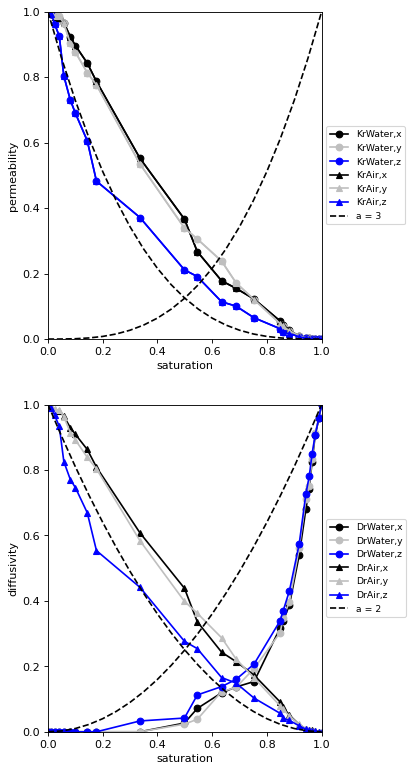

In [24]:
from matplotlib.font_manager import FontProperties
%matplotlib inline
print(sat)
print(perm_water['0'][:])


fontP = FontProperties()
fontP.set_size('small')
# Setting up subplots
fig = plt.figure(figsize=(6, 10), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(211)   #top
ax2 = fig.add_subplot(212)   #bottom

x_values1 = [x/20 for x in range(21)]
z = '.75'
perm_water['0'] = perm_water['0']
# Plots for subplot1 - strict permeability
p1, = ax1.plot(sat, perm_water['0'], color = 'k', linestyle = '-', marker = 'o')
p2, = ax1.plot(sat, perm_water['1'], color = z, linestyle = '-', marker = 'o')
p3, = ax1.plot(sat, perm_water['2'], color = 'b', linestyle = '-', marker = 'o')
p4, = ax1.plot(sat, perm_air['0'], color = 'k', linestyle = '-', marker = '^')
p5, = ax1.plot(sat, perm_air['1'], color = z, linestyle = '-', marker = '^')
p6, = ax1.plot(sat, perm_air['2'], color = 'b', linestyle = '-', marker = '^')
p10, = ax1.plot(x_values1, [x**(3) for x in x_values1], 'k--')
ax1.plot(x_values1, [(1-x)**(3) for x in x_values1], 'k--')
#gs1, = ax1.plot(gostick_saturation_1, gostick_perm_air_case1, color = 'r', linestyle = '-', marker = 'D')
#gs2, = ax1.plot(gostick_saturation_2, gostick_perm_water, color = 'r', linestyle = '-', marker = 'o')
ax1.set_ylabel('permeability')
ax1.set_xlabel("saturation")
ax1.set_ylim([0,1])
ax1.set_xlim([0,1])

# Need to work on legend to match up with the right things
lgd1 = ax1.legend([p1, p2, p3, p4, p5, p6, p10, 
                   # gs1, gs2
                  ],
                  ["KrWater,x", "KrWater,y", "KrWater,z",
                   "KrAir,x","KrAir,y","KrAir,z", "a = 3"
                   #"Gostick et al \n KrAir,x (case 1)", 
                   #"Gostick et al \n KrWater,x"
                   ], 
                  loc='center left', bbox_to_anchor=(1, 0.5), prop=fontP)

# Plots for subplot4 - diffusivity
p11, = ax2.plot(sat, diff_water['0'], color = 'k', linestyle = '-', marker = 'o')
p12, = ax2.plot(sat, diff_water['1'], color = z, linestyle = '-', marker = 'o')
p13, = ax2.plot(sat, diff_water['2'], color = 'b', linestyle = '-', marker = 'o')
p14, = ax2.plot(sat, diff_air['0'], color = 'k', linestyle = '-', marker = '^')
p15, = ax2.plot(sat, diff_air['1'], color = z, linestyle = '-', marker = '^')
p16, = ax2.plot(sat, diff_air['2'], color = 'b', linestyle = '-', marker = '^')
p20, = ax2.plot(x_values1, [x**(2) for x in x_values1], 'k--')
ax2.plot(x_values1, [(1-x)**(2) for x in x_values1], 'k--')
#gs3, = ax2.plot(gostick_saturation_3, gostick_diff_air_case1, color = 'r', linestyle = '-', marker = 'D')
#gs4, = ax2.plot(gostick_saturation_4, gostick_diff_water, color = 'r', linestyle = '-', marker = 'o')
ax2.set_ylabel('diffusivity')
ax2.set_xlabel("saturation")
ax2.set_ylim([0,1])
ax2.set_xlim([0,1])

lgd2 = ax2.legend([p11, p12, p13, p14, p15, p16, p20,
                   # gs3, gs4
                    ],
                  ["DrWater,x", "DrWater,y", "DrWater,z",
                   "DrAir,x","DrAir,y","DrAir,z", "a = 2",
                  # "Gostick et al \n DrAir,x (case 1)", 
                  # "Gostick et al \n DrWater,x"], 
                   ], 
                  loc='center left', bbox_to_anchor=(1, 0.5), prop=fontP)

fig.subplots_adjust(left=0.13, right=.7, top=0.95, bottom=0.05)

plt.show()

# New version of openpnm for computing for relative permeabilites and diffusitivities curve

# Obtaining Relative Diffusivity Curves

In [1]:
import numpy as np
import openpnm as op
import matplotlib.pyplot as plt
op.visualization.set_mpl_style()
np.random.seed(10)
%matplotlib inline
np.set_printoptions(precision=5)

/home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pn = op.network.Cubic(shape=[15, 15, 15], spacing=1e-6)
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
air = op.phase.Air(network=pn,name='air')
air['pore.surface_tension'] = 0.072
air['pore.contact_angle'] = 180.0
air.add_model_collection(op.models.collections.phase.air)
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
water = op.phase.Water(network=pn,name='water')
water['pore.diffusivity'] = 1e-9
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

In [3]:
drn = op.algorithms.Drainage(network=pn, phase=water)
drn.set_inlet_BC(pn.pores('left'))
drn.run()

Performing drainage simulation: 100%|██████████| 25/25 [00:00<00:00, 778.50it/s]


In [4]:
water['pore.occupancy'] = drn['pore.invasion_pressure'] < 10000
water['throat.occupancy'] = drn['throat.invasion_pressure'] < 10000
air['pore.occupancy'] = 1 - water['pore.occupancy']
air['throat.occupancy'] = 1 - water['throat.occupancy']

In [5]:
def sat_update(network, nwp, wp):
    r"""
        Calculates the saturation of each phase using occupancy information from ordinary percolation.
        Parameters
        ----------
        network: network
        nwp : phase
            non-wetting phase
        wp : phase
            wetting phase
    """
    pore_mask = nwp["pore.occupancy"] == 1
    throat_mask = nwp["throat.occupancy"] == 1
    sat_p = np.sum(network['pore.volume'][pore_mask])
    sat_t = np.sum(network['throat.volume'][throat_mask])
    sat1 = sat_p + sat_t
    bulk = network['pore.volume'].sum() + network['throat.volume'].sum()
    sat = sat1/bulk
    return sat

In [6]:
def Rate_calc(network, phase, inlet, outlet, conductance):
        phase.regenerate_models()
        Fd = op.algorithms.FickianDiffusion(network=network, phase=phase)
        Fd.settings._update({'conductance' : conductance})
        Fd.set_value_BC(pores=inlet, values=1)
        Fd.set_value_BC(pores=outlet, values=0)
        Fd.run()
        val = np.abs(Fd.rate(pores=inlet, mode='group'))
        return val

In [7]:
diff_in = pn.pores('left')
diff_out = pn.pores('right')

In [8]:
model_mp_cond = op.models.physics.multiphase.conduit_conductance
air.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
water.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')

In [9]:
Snwparr = []
reldiff_nwp = []
reldiff_wp = []
for Pc in np.unique(drn['pore.invasion_pressure']):
    water['pore.occupancy'] = drn['pore.invasion_pressure'] < Pc
    water['throat.occupancy'] = drn['throat.invasion_pressure'] < Pc
    air['pore.occupancy'] = 1 - water['pore.occupancy']
    air['throat.occupancy'] = 1 - water['throat.occupancy']
    air.regenerate_models()
    water.regenerate_models()
    sat_point = sat_update(pn, water, air)
    Snwparr.append(sat_point)
    Rate_single_nwp = Rate_calc(pn, air, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_single_wp = Rate_calc(pn, water, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_mult_nwp = Rate_calc(pn, air, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    Rate_mult_wp = Rate_calc(pn, water, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    reldiff_nwp.append(Rate_mult_nwp/Rate_single_nwp)
    reldiff_wp.append(Rate_mult_wp/Rate_single_wp)

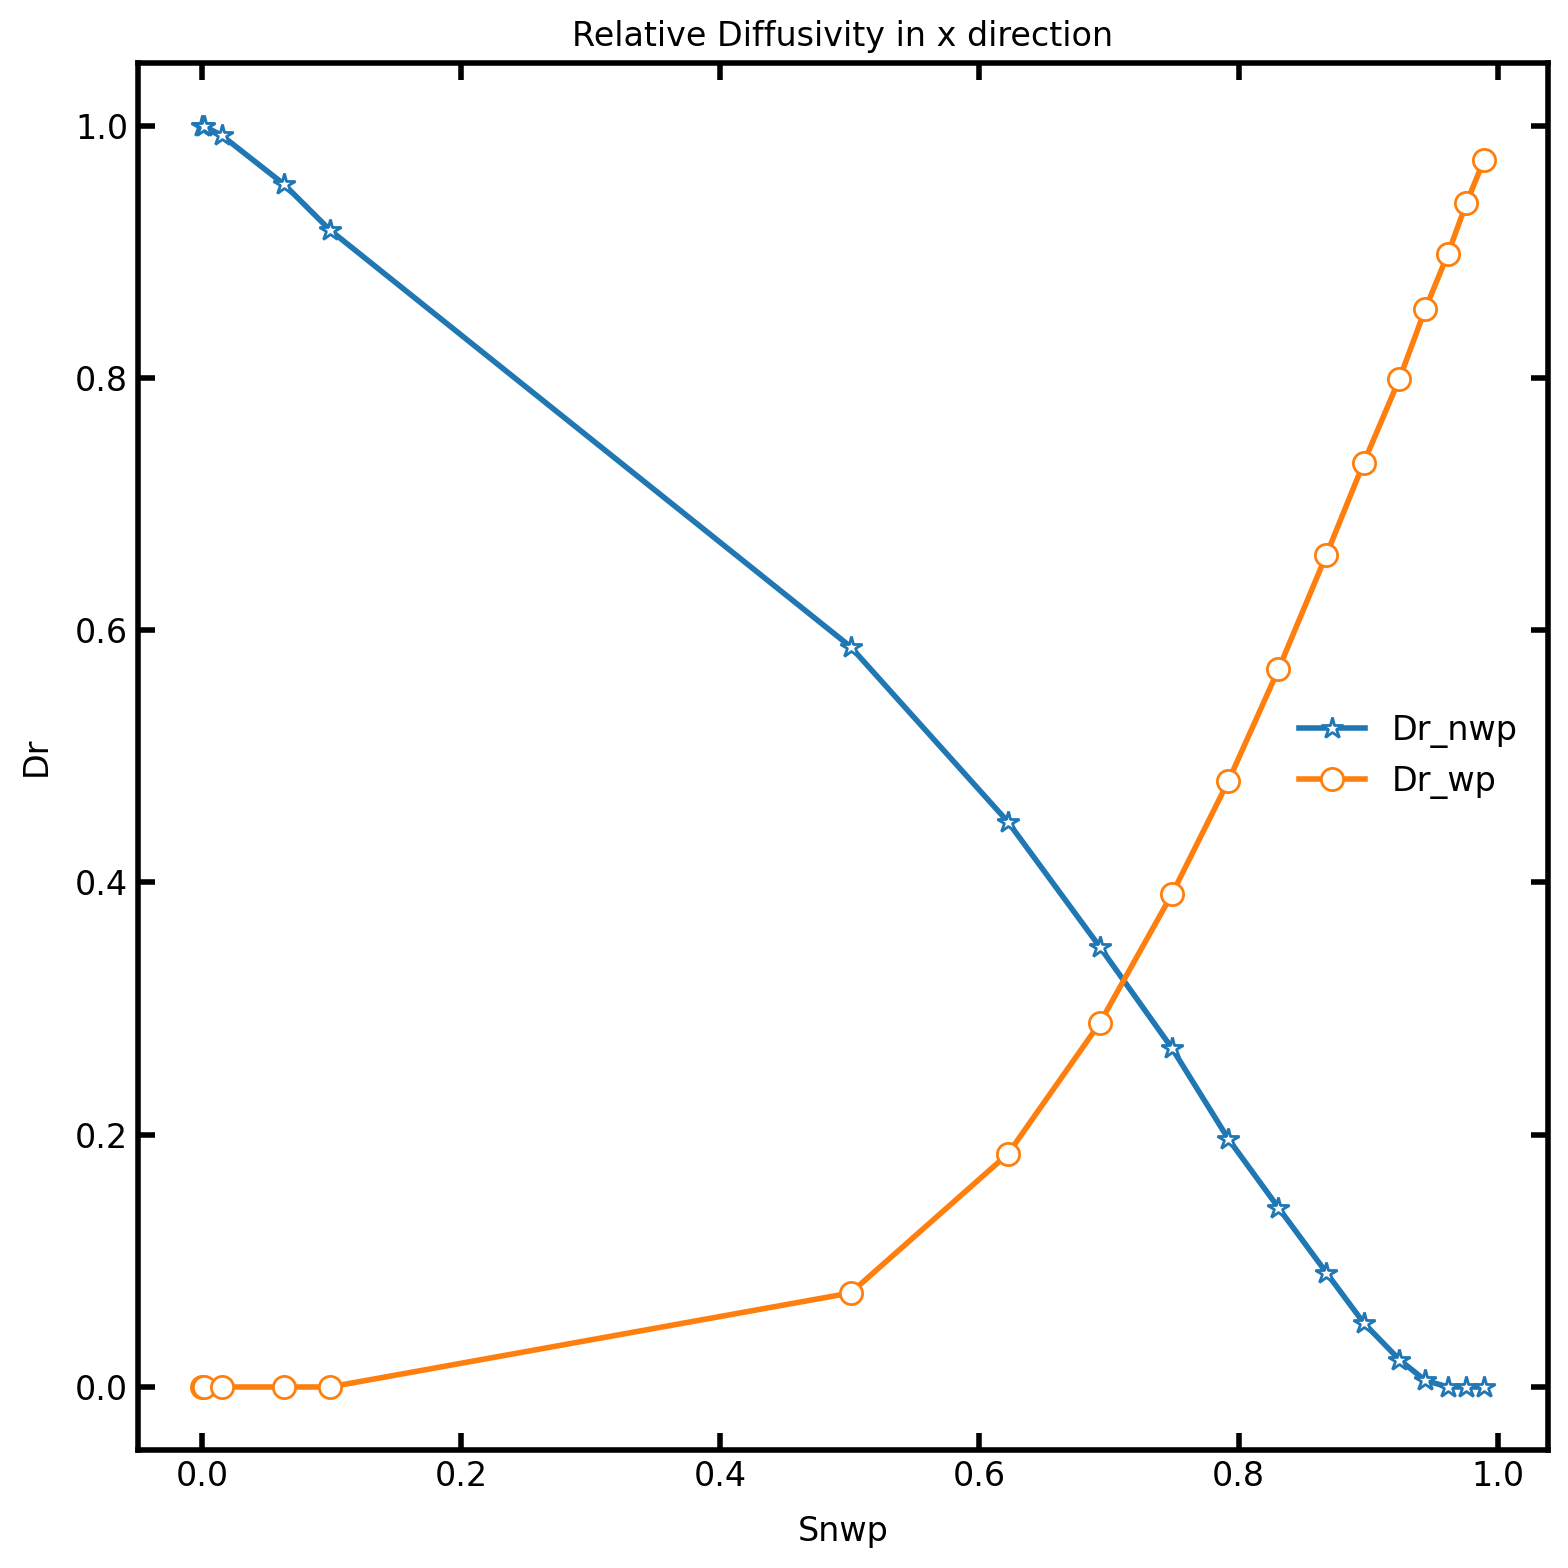

In [11]:
plt.figure(figsize=[8,8])
plt.plot(Snwparr, reldiff_nwp, '*-', label='Dr_nwp')
plt.plot(Snwparr, reldiff_wp, 'o-', label='Dr_wp')
plt.xlabel('Snwp')
plt.ylabel('Dr')
plt.title('Relative Diffusivity in x direction')
plt.legend()

# Predicting relative permeability

In [12]:
import numpy as np
import openpnm as op
import matplotlib.pyplot as plt
op.visualization.set_mpl_style()
np.random.seed(10)
%matplotlib inline
np.set_printoptions(precision=5)

In [13]:
pn = op.network.Cubic(shape=[15, 15, 15], spacing=1e-6)
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
air = op.phase.Air(network=pn,name='air')
air['pore.surface_tension'] = 0.072
air['pore.contact_angle'] = 180.0
air.add_model_collection(op.models.collections.phase.air)
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
water = op.phase.Water(network=pn,name='water')
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

[11:27:07] WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=744883;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=134551;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

In [14]:
ip = op.algorithms.InvasionPercolation(network=pn, phase=air)
Finlets_init = pn.pores('left')
Finlets=([Finlets_init[x] for x in range(0, len(Finlets_init), 2)])
ip.set_inlet_BC(pores=Finlets)
ip.run()

In [15]:
def sat_occ_update(network, nwp, wp, ip, i):
    r"""
        Calculates the saturation of each phase using the invasion
        sequence from either invasion percolation.
        Parameters
        ----------
        network: network
        nwp : phase
            non-wetting phase
        wp : phase
            wetting phase
        ip : IP
            invasion percolation (ran before calling this function)
        i: int
            The invasion_sequence limit for masking pores/throats that
            have already been invaded within this limit range. The
            saturation is found by adding the volume of pores and thorats
            that meet this sequence limit divided by the bulk volume.
    """
    pore_mask = ip['pore.invasion_sequence'] < i
    throat_mask = ip['throat.invasion_sequence'] < i
    sat_p = np.sum(network['pore.volume'][pore_mask])
    sat_t = np.sum(network['throat.volume'][throat_mask])
    sat1 = sat_p + sat_t
    bulk = network['pore.volume'].sum() + network['throat.volume'].sum()
    sat = sat1/bulk
    nwp['pore.occupancy'] = pore_mask
    nwp['throat.occupancy'] = throat_mask
    wp['throat.occupancy'] = 1-throat_mask
    wp['pore.occupancy'] = 1-pore_mask
    return sat

In [16]:
def Rate_calc(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    St_p = op.algorithms.StokesFlow(network=network, phase=phase)
    St_p.settings._update({'conductance' : conductance})
    St_p.set_value_BC(pores=inlet, values=1)
    St_p.set_value_BC(pores=outlet, values=0)
    St_p.run()
    val = np.abs(St_p.rate(pores=inlet, mode='group'))
    return val

In [17]:
flow_in = pn.pores('left')
flow_out = pn.pores('right')

In [18]:
model_mp_cond = op.models.physics.multiphase.conduit_conductance
air.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
              throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
water.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
              throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')

In [19]:
Snwp_num=10
flow_in = pn.pores('left')
flow_out = pn.pores('right')
max_seq = np.max([np.max(ip['pore.invasion_sequence']),
          np.max(ip['throat.invasion_sequence'])])
start = max_seq//Snwp_num
stop = max_seq
step = max_seq//Snwp_num
Snwparr = []
relperm_nwp = []
relperm_wp = []

In [20]:
for i in range(start, stop, step):
    air.regenerate_models();
    water.regenerate_models();
    sat = sat_occ_update(network=pn, nwp=air, wp=water, ip=ip, i=i)
    Snwparr.append(sat)
    Rate_abs_nwp = Rate_calc(pn, air, flow_in, flow_out, conductance = 'throat.hydraulic_conductance')
    Rate_abs_wp = Rate_calc(pn, water, flow_in, flow_out, conductance = 'throat.hydraulic_conductance')
    Rate_enwp = Rate_calc(pn, air, flow_in, flow_out, conductance = 'throat.conduit_hydraulic_conductance')
    Rate_ewp = Rate_calc(pn, water, flow_in, flow_out, conductance = 'throat.conduit_hydraulic_conductance')
    relperm_nwp.append(Rate_enwp/Rate_abs_nwp)
    relperm_wp.append(Rate_ewp/Rate_abs_wp)

[11:29:13] WARNING  throat.conduit_hydraulic_conductance was not run since the following property is ]8;id=643217;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=143115;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.occupancy'                                                                    

           WARNING  throat.conduit_hydraulic_conductance was not run since the following property is ]8;id=964172;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=308528;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.occupancy'                                                                    

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=460042;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=384784;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=670509;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858176;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=186830;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499667;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

[11:29:14] WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=672933;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=966546;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=520562;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937330;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=709415;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=100368;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=559260;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=49832;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=445220;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=729656;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=939688;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=18960;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=497449;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=456339;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=261294;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=714498;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=187070;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=967070;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=971750;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892758;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=870463;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=618760;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=29470;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580485;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

[11:29:15] WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=544090;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=54662;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=951006;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689499;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=702312;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410240;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=506544;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=604113;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=593027;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740011;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=265112;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=472015;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=213154;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=258125;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=274732;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129403;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=225215;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=7676;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=313063;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718754;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=792562;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=593259;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

           WARNING  throat.diffusive_conductance was not run since the following property is         ]8;id=614075;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948055;file:///home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/openpnm/core/_models.py#480\480]8;;\
                    missing: 'throat.diffusivity'                                                                  

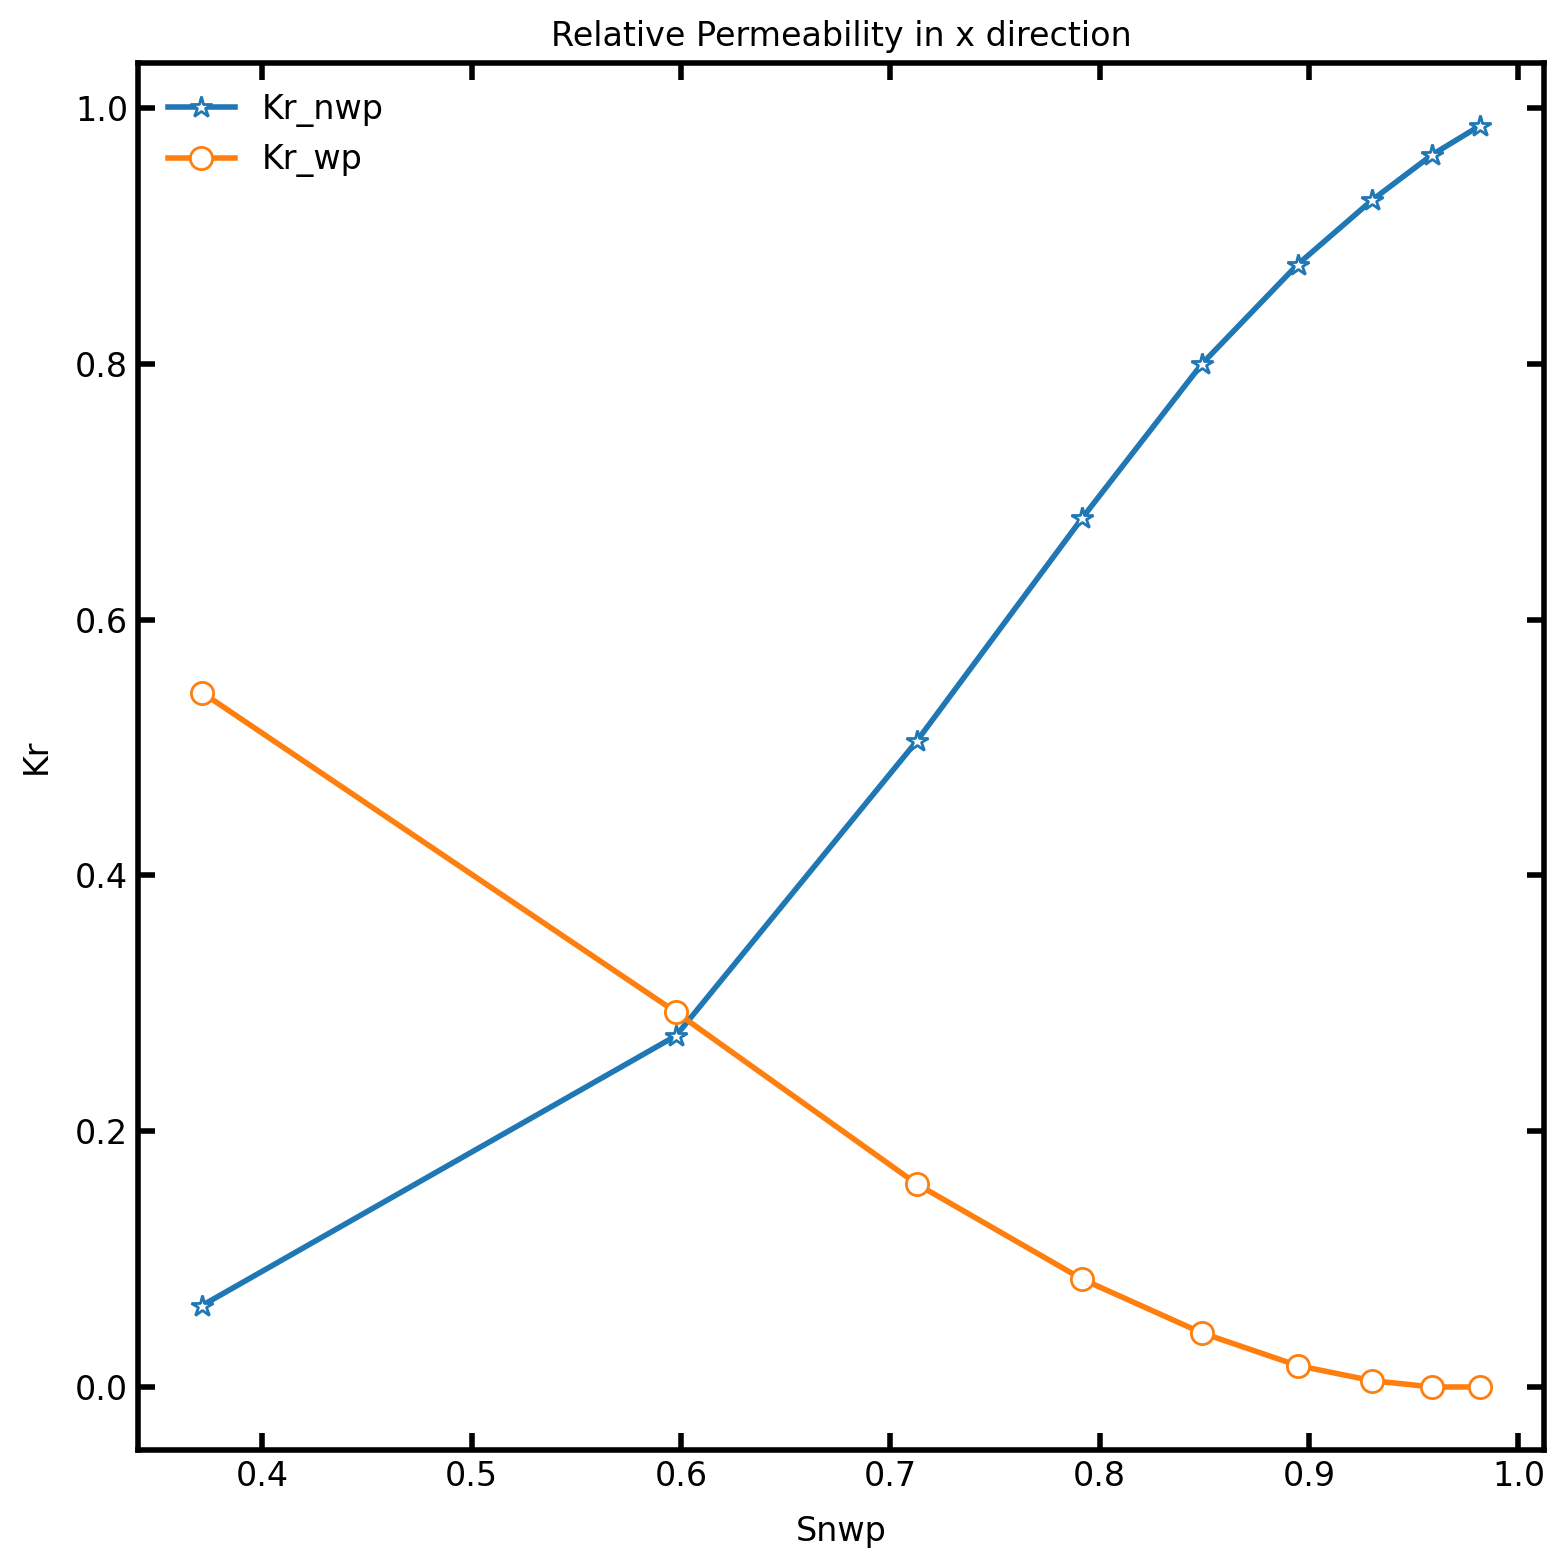

In [21]:
plt.figure(figsize=[8,8])
plt.plot(Snwparr, relperm_nwp, '*-', label='Kr_nwp')
plt.plot(Snwparr, relperm_wp, 'o-', label='Kr_wp')
plt.xlabel('Snwp')
plt.ylabel('Kr')
plt.title('Relative Permeability in x direction')
plt.legend()

# Compute relative transport properties from real world images

In [4]:
import os
import imageio
import scipy as sp
import numpy as np
import openpnm as op
import openpnm.models.geometry as gmods
from openpnm.models import physics as pm
import porespy as ps
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
import openpnm.models as mods
np.random.seed(10)
%matplotlib inline


ImportError: /home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/scipy/fft/_pocketfft/pypocketfft.cpython-39-x86_64-linux-gnu.so)

In [2]:
import os
import imageio
import numpy as np
import openpnm as op
import porespy as ps
import matplotlib.pyplot as plt
op.visualization.set_mpl_style()
np.random.seed(10)
%matplotlib inline
np.set_printoptions(precision=5)

ImportError: /home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/justin/miniconda3/envs/openpnm3/lib/python3.9/site-packages/scipy/fft/_pocketfft/pypocketfft.cpython-39-x86_64-linux-gnu.so)

In [2]:
path = '/home/justin/Documents/artices4_these/'
file_format = '.tif'
#file_name = 'Berea_sandstone'
file_name = 'beadpack'
file = file_name + file_format
fetch_file = os.path.join(path, file)
im = imageio.mimread(fetch_file)
im_org =im.copy()
im = ~np.array(im, dtype=bool)[:250, :250, :250] # Make image a bit smaller

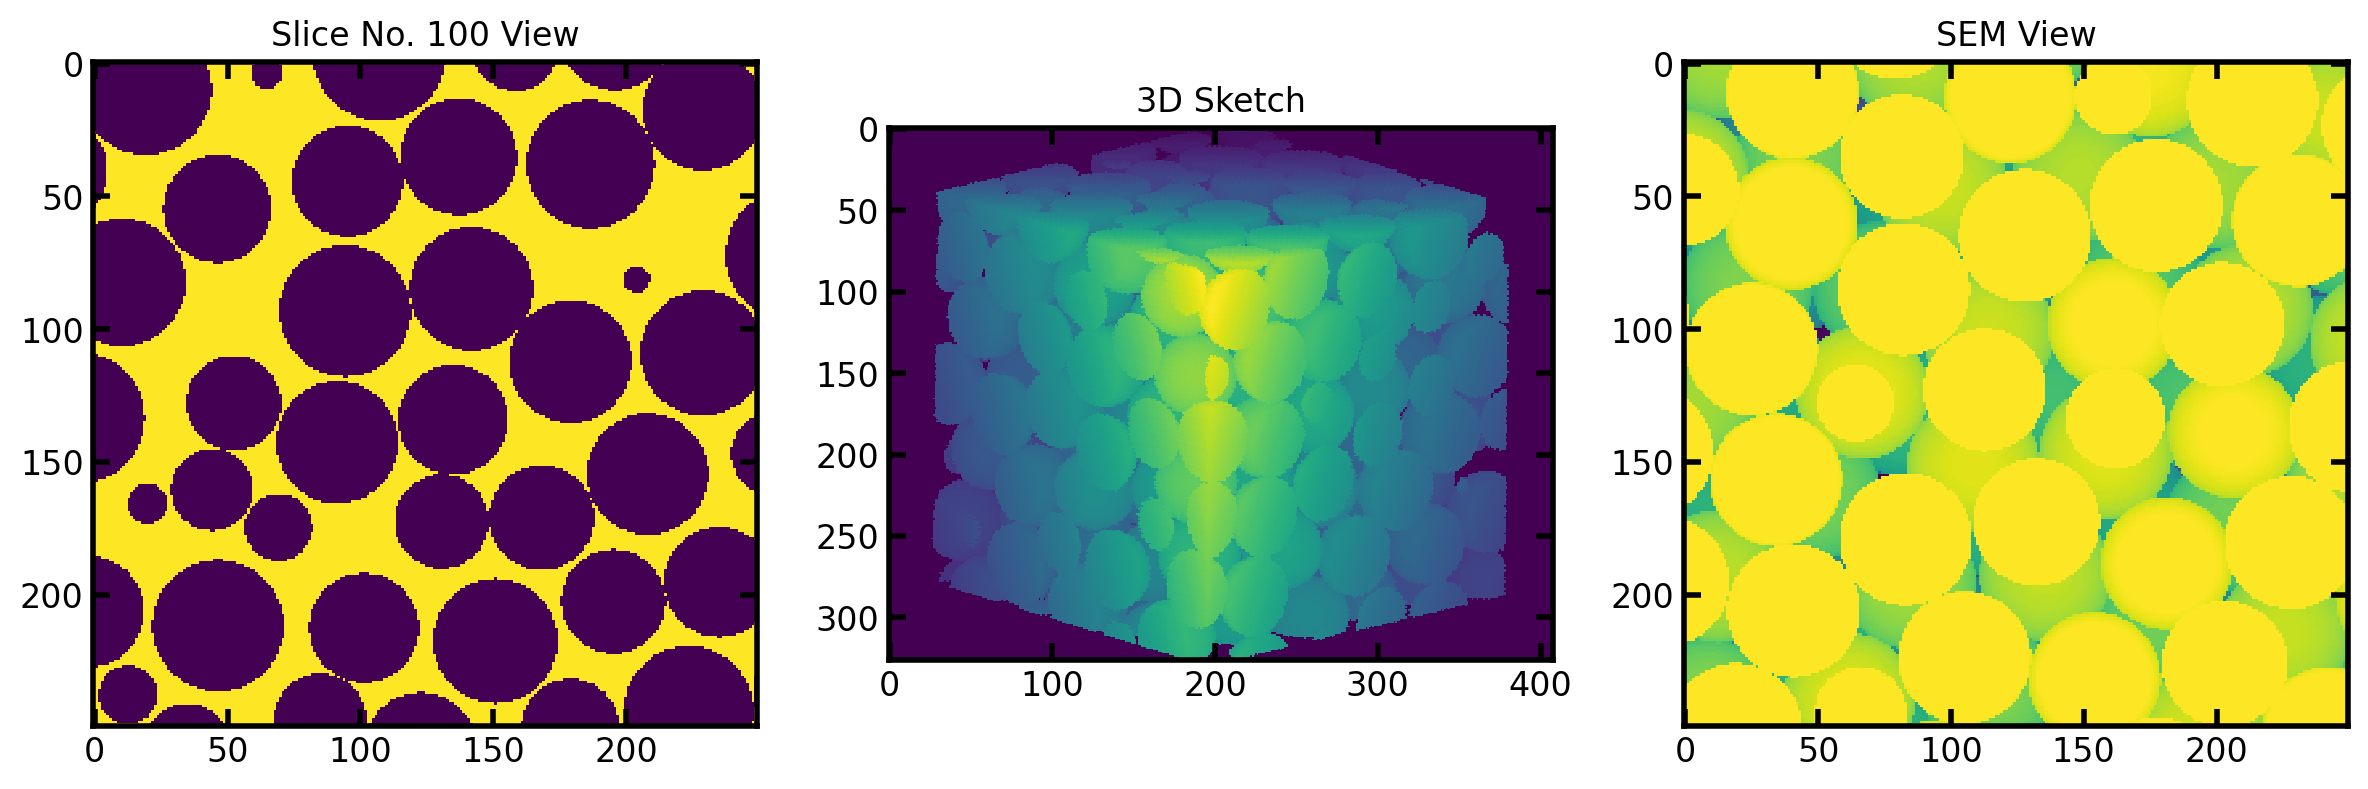

In [3]:
# NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].imshow(im[:, :, 100]);
ax[1].imshow(ps.visualization.show_3D(im));
ax[2].imshow(ps.visualization.sem(im));
ax[0].set_title("Slice No. 100 View");
ax[1].set_title("3D Sketch");
ax[2].set_title("SEM View");

In [1]:
settings = {'pore_shape': 'pyramid',
            'throat_shape': 'cuboid',
            
            'pore_diameter': 'equivalent_diameter',
            'throat_diameter': 'inscribed_diameter'}

#NBVAL_IGNORE_OUTPUT

resolution = 1e-6
snow = ps.networks.snow2(im, voxel_size=resolution,accuracy='standard')
proj= op.io.PoreSpy.import_data(snow.network, settings=settings)
net = proj[0]
geo =proj[1]
#net = op.io.network_from_porespy(snow.network)   
pn = ps.networks.label_boundaries(net,labels=[['left', 'right'], ['front', 'back'], [ 'bottom','top']], tol=1e-9)

NameError: name 'ps' is not defined

In [2]:
proj= pn.project

geo['pore.area']=geo['pore.surface_area']

geo['throat.area'] =  geo['throat.cross_sectional_area']    

geo['throat.surface_area'] = geo['throat.volume']/geo['throat.equivalent_diameter']

geo['throat.conduit_lengths.pore1']= geo['throat.length']
geo['throat.conduit_lengths.pore2']= geo['throat.length']

geo.add_model(propname='throat.endpoints',
              model=mods.geometry.throat_endpoints.spherical_pores)
geo.add_model(propname='pore.area',
              model=mods.geometry.pore_cross_sectional_area.sphere)
geo.add_model(propname='pore.volume',
              model=mods.geometry.pore_volume.sphere)
geo.add_model(propname='throat.length',
              model=mods.geometry.throat_length.ctc)
geo.add_model(propname='throat.volume',
              model=mods.geometry.throat_volume.cylinder)
geo.add_model(propname='throat.area',
              model=mods.geometry.throat_cross_sectional_area.cylinder)
geo.add_model(propname='throat.surface_area',
              model=mods.geometry.throat_surface_area.cylinder)
geo.add_model(propname='throat.endpoints',
              model=mods.geometry.throat_endpoints.spherical_pores)
geo.add_model(propname='throat.conduit_lengths',
              model=mods.geometry.throat_length.conduit_lengths)

NameError: name 'pn' is not defined

In [20]:
#pn = op.network.Cubic(shape=[15, 15, 15], spacing=1e-6)
#pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
#pn.regenerate_models()
air = op.phase.Air(network=pn,name='air')
air['pore.surface_tension'] = 0.072
air['pore.contact_angle'] = 180.0
air.add_model_collection(op.models.collections.phase.air)
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
water = op.phase.Water(network=pn,name='water')
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

NameError: name 'pn' is not defined